In [684]:
import random
import numpy as np
import matplotlib.pyplot as plt
random.seed(1)

n,m = 20,2
w = [-1 + 2*random.random(), random.random()]
b = [random.random(),random.random()]
b.sort()
print(w)
print(b)

i = 0
dataPointSet=[]
label = []
while i<n:
    dataPointSet.append([])
    for j in range(m):
        dataPointSet[-1].append(-10 + random.random()*20)
    x = dataPointSet[-1]
    if w[0]*x[0] + w[1]*x[1] >= b[1]:
        label.append(1)
        i = i+1
    elif w[0]*x[0] + w[1]*x[1] <= b[0]:
        label.append(-1)
        i = i+1
    else:
        dataPointSet.remove(x)
print("data label =",label)
print(dataPointSet)

[-0.7312715117751976, 0.8474337369372327]
[0.2550690257394217, 0.763774618976614]
data label = [-1, 1, -1, -1, -1, 1, 1, -1, 1, -1, 1, 1, 1, -1, 1, -1, -1, -1, -1, 1]
[[-0.09129825816118142, -1.010178704225238], [3.031859454455258, 5.7744670227102635], [-8.122808264515303, -9.433050469559873], [6.715302078397393, -1.344658641898933], [5.245601649158839, -9.957878932977787], [-1.092256118903972, 4.430800646815651], [-5.424755574590947, 8.905413911078448], [8.028549152229672, -9.388200339328929], [-9.491082780130784, 0.8282494558699316], [8.782983255570212, -2.375915246235751], [-5.668012057387733, -1.5576684883456533], [-9.419184248502642, -5.566166674539299], [-1.2422481269885584, -0.0837551723629879], [-5.338310994848547, -5.382669169180314], [-5.624379253246228, -0.8079306852453279], [-4.204367708190288, -9.570205894681823], [6.751559513251458, 1.129086453048668], [2.8458872586489115, -6.281874682105646], [9.850868243521301, 7.198930575905798], [-7.582200803883872, -3.346096292797417

In [685]:
def IPM(A,b,problem,r,epsilon,mu_0,C):
    m = len(A)
    n = len(A[0,:])
    print(m,n)
    import random
    x0=[]
    for i in range(n):
        x0.append([random.randint(1,100)])
    y0=[]
    for i in range(m):
        y0.append([random.randint(1,100)])
    s0=[]
    for i in range(n):
        #s0.append([random.randint(1,100)])
        s0.append([1])

    x0=np.array(x0)
    y0=np.array(y0)
    s0=np.array(s0)
    
    c = np.zeros((n,1))
    c[0,0] = x0[0,0]-x0[1,0]
    c[1,0] = -(x0[0,0]-x0[1,0])
    c[2,0] = x0[2,0]-x0[3,0]
    c[3,0] = -(x0[2,0]-x0[3,0])
    c[6:26,0] = C

    mu=[]
    mu.append(mu_0)
    if problem == "LP":
        e=np.ones((n,1))
    else:
        e=np.ones((n,1))

    k=0
    while mu[k]>epsilon*mu_0:
        #mu[k]=mu_0*(1/10)**k
        solution=np.vstack((x0,y0,s0))

        if problem == "LP":
            X=np.diag(x0[:,0])
            S=np.diag(s0[:,0])
        else:
            X=np.diag(x0[:,0])
            S=np.diag(s0[:,0])

        r1=b-A.dot(x0)
        r2=c-A.transpose().dot(y0)-s0
        r3=mu[k]*e-X.dot(S).dot(e)
        residual=np.vstack((r1,r2,r3))

        A1=np.hstack((A,np.zeros((m,m)),np.zeros((m,n))))
        A2=np.hstack((np.zeros((n,n)),A.transpose(),np.identity(n)))
        A3=np.hstack((S,np.zeros((n,m)),X))
        barA=np.vstack((A1,A2,A3))

        #NewtonDirection=np.linalg.inv(barA.transpose().dot(barA)).dot(barA.transpose()).dot(residual)
        NewtonDirection=np.linalg.inv(barA).dot(residual)
        delta_x=NewtonDirection[0:n,0].reshape(n,1)
        delta_y=NewtonDirection[n:n+m,0].reshape(m,1)
        delta_s=NewtonDirection[n+m:2*n+m,0].reshape(n,1)

        if problem == "LP":
            stepSizeX=determineStepSize(x0,delta_x,r)
            stepSizeS=determineStepSize(s0,delta_s,r)
        else:
            stepSizeX=determineStepSize(x0,delta_x,r)
            stepSizeS=determineStepSize(s0,delta_s,r)

        x0=x0+stepSizeX*delta_x
        y0=y0+stepSizeS*delta_y
        s0=s0+stepSizeS*delta_s
        
        c[0,0] = x0[0,0]-x0[1,0]
        c[1,0] = -(x0[0,0]-x0[1,0])
        c[2,0] = x0[2,0]-x0[3,0]
        c[3,0] = -(x0[2,0]-x0[3,0])
        
        if k > 0 and k%10 == 0:
            print("interation:",k)
            print("primal feasibility:",np.linalg.norm(r1))
            print("dual feasibility:",np.linalg.norm(r2))
            print("duality gap:",np.linalg.norm(r3))
        
        k=k+1
        #mu.append(mu_0*(1/2)**k) #method 1
        #mu.append(mu[-1]*(1-1/(10*np.sqrt(2)))**k) #method 2
        mu.append((1/10)*x0.transpose().dot(s0)/n) #complementary condition method 3
        
    
    print("iteration: %d" % k)
    print("primal feasibility:",np.linalg.norm(r1))
    print("dual feasibility:",np.linalg.norm(r2))
    print("duality gap:",np.linalg.norm(r3))
    print("x0 is ",x0)
   
    print("w1=",x0[0,0]-x0[1,0])
    print("w2=",x0[2,0]-x0[3,0])
    print("b=",x0[4,0]-x0[5,0])
    return x0[0,0]-x0[1,0], x0[2,0]-x0[3,0], x0[4,0]-x0[5,0]
    

def determineStepSize(x,d,r):
    n=len(d)
    stepSize=float("inf")
    for i in range(n):
        if d[i] < 0 and stepSize>-x[i]/d[i]:
            stepSize=-x[i]/d[i]
    stepSize=min([1,r*stepSize])
    return stepSize

In [686]:
m,n = 20,46
mu_0=10
r=0.6
epsilon=1e-12
C = 100
problem = "SVM"

A = np.zeros((m,n))
for i in range(m):
    A[i,0] = label[i]*dataPointSet[i][0]
    A[i,1] = -label[i]*dataPointSet[i][0]
    A[i,2] = label[i]*dataPointSet[i][1]
    A[i,3] = -label[i]*dataPointSet[i][1]
    A[i,4] = label[i]
    A[i,5] = -label[i]
    A[i,6+i] = 1
    A[i,26+i] = -1
#print(A)

b = np.ones((m,1))

#let objective function C = 100, w1_bar = 1, w2_bar = 1

In [687]:
w1,w2,b = IPM(A,b,problem,r,epsilon,mu_0,C)

20 46
interation: 10
primal feasibility: 210.94110144497944
dual feasibility: 2121.5390502527794
duality gap: 149.40321652929947
interation: 20
primal feasibility: 0.03280155244653301
dual feasibility: 0.8495165937831607
duality gap: 0.16541273777209525
interation: 30
primal feasibility: 4.302663050435038e-06
dual feasibility: 0.0008081413386121804
duality gap: 9.036554451367947e-05
interation: 40
primal feasibility: 3.188101041813166e-08
dual feasibility: 2.610193901277801e-07
duality gap: 2.2640767336051672e-08
iteration: 45
primal feasibility: 5.660689374422768e-07
dual feasibility: 3.9399215106302675e-08
duality gap: 7.961239541689604e-10
x0 is  [[2.55410685e+03]
 [2.55499076e+03]
 [2.52276252e+03]
 [2.52170182e+03]
 [2.53794954e+03]
 [2.53795874e+03]
 [2.22818952e-13]
 [2.20788904e-13]
 [2.20785101e-13]
 [2.20808440e-13]
 [2.20814247e-13]
 [2.20803781e-13]
 [2.20805165e-13]
 [2.20818918e-13]
 [2.20772179e-13]
 [2.20808394e-13]
 [2.20787772e-13]
 [2.20830144e-13]
 [2.22926031e-13]


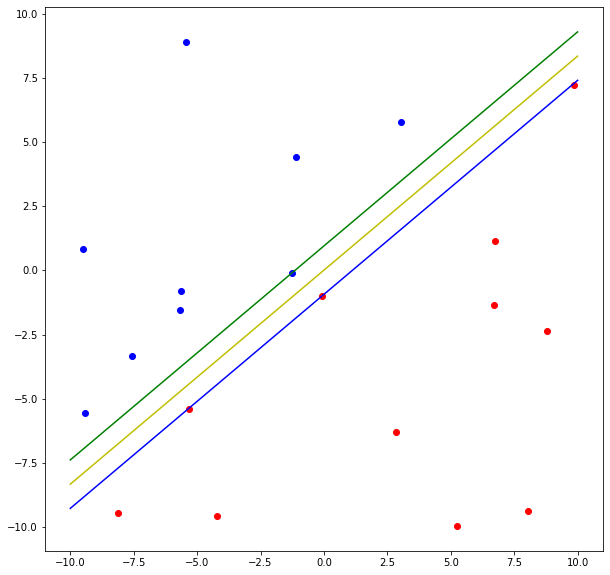

In [688]:
x0_b = []
x1_b = []
x0_r = []
x1_r = []
for i in range(len(label)):
    if label[i] == 1:
        x0_b.append(dataPointSet[i][0])
        x1_b.append(dataPointSet[i][1])
    else:
        x0_r.append(dataPointSet[i][0])
        x1_r.append(dataPointSet[i][1])
plt.figure(figsize=(10, 10))
plt.scatter(x0_b, x1_b, c = 'blue')
plt.scatter(x0_r, x1_r, c = 'red')

x = np.linspace(-10,10,100)
y = []
for i in range(len(x)):
    y.append((-w1*x[i]-b)/w2)
plt.plot(x,y,'y')
y = []
for i in range(len(x)):
    y.append((1-w1*x[i]-b)/w2)
plt.plot(x,y,'g')
y = []
for i in range(len(x)):
    y.append((-1-w1*x[i]-b)/w2)
plt.plot(x,y,'b')